<h2>Scipy:
We have the min and max temperatures in a city In India for each months of the year.<br>
We would like to find a function to describe this and show it graphically, the dataset<br>
given below.<br>
Task:<br>
1. fitting it to the periodic function<br>
2. plot the fit<br>
Data<br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25<br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18</h2>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [3]:
Max = list(Max)
Min = list(Min)

In [4]:
data = pd.DataFrame(data=Max, columns=['Max'])
data['Min'] = Min
data.head()

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32


In [5]:
months = data.index

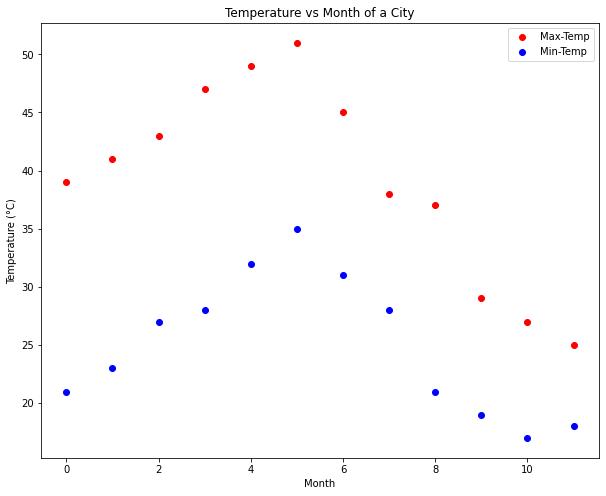

In [6]:
plt.figure(figsize=(10,8))

plt.scatter(x=months, y=Max, color='red', label='Max-Temp')
plt.scatter(x=months, y=Min, color='blue', label='Min-Temp')

plt.title('Temperature vs Month of a City')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

In [7]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, data['Max'])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, data['Min'])

In [8]:
new_months = np.linspace(start=0, stop=max(months) + 1, num=100)

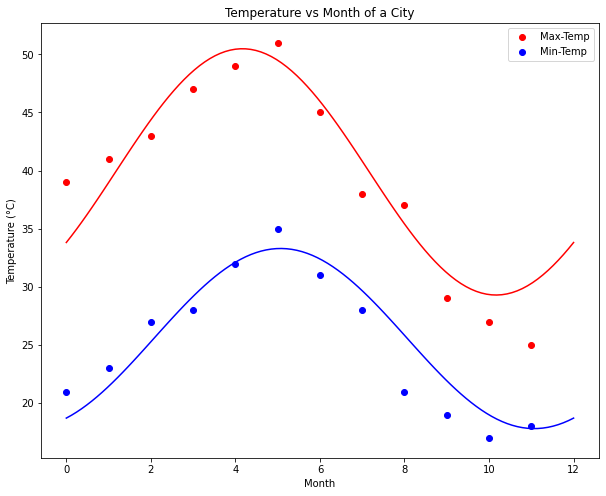

In [9]:
plt.figure(figsize=(10,8))

plt.scatter(x=months, y=Max, color='red', label='Max-Temp')
plt.plot(new_months, yearly_temps(new_months, *res_max), c='red')

plt.scatter(x=months, y=Min, color='blue', label='Min-Temp')
plt.plot(new_months, yearly_temps(new_months, *res_min), c='blue')

plt.title('Temperature vs Month of a City')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

<h2># Matplotlib:<br>
This assignment is for visualization using matplotlib:<br>
data to use:<br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv<br>
titanic = pd.read_csv(url)<br>
Charts to plot:<br>
1. Create a pie chart presenting the male/female proportion<br>
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender<br></h2>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
url = r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [12]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<h3> 1. Create a pie chart presenting the male/female proportion </h3>

In [13]:
data = titanic['sex'].dropna(how=any).value_counts()
data

male      843
female    466
Name: sex, dtype: int64

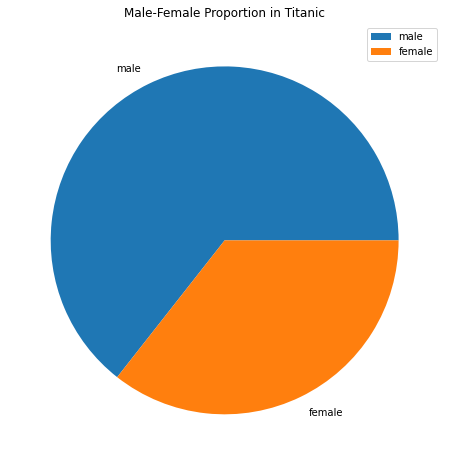

In [14]:
plt.figure(figsize=(8,8))

plt.pie(x=data, labels=data.index)
plt.title('Male-Female Proportion in Titanic')
plt.legend()
plt.show()

<h3>2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender </h3>

In [15]:
new_df = titanic[['fare', 'age', 'sex']].dropna(how='any')
new_df.head()

,fare,age,sex
0,211.3375,29.0000,female
1,151.5500,0.9167,male
2,151.5500,2.0000,female
3,151.5500,30.0000,male
4,151.5500,25.0000,female


In [16]:
male_index = new_df['sex'][new_df['sex'] == 'male'].index
female_index = new_df['sex'][new_df['sex'] == 'female'].index

In [17]:
titanic['age'][male_index]

1        0.9167
3       30.0000
5       48.0000
7       39.0000
9       71.0000
         ...   
1299    27.0000
1301    45.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 657, dtype: float64

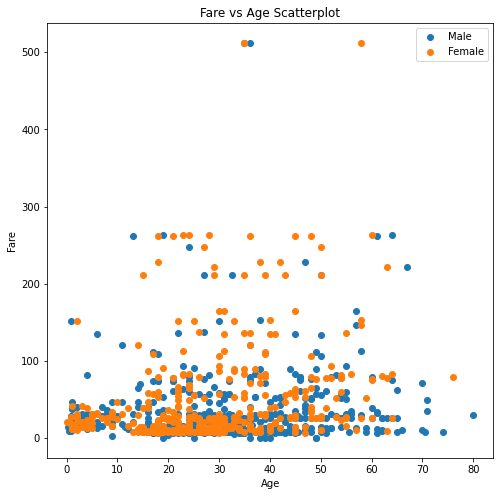

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(x=titanic['age'][male_index], y=titanic['fare'][male_index], label='Male')
plt.scatter(x=titanic['age'][female_index], y=titanic['fare'][female_index], label='Female')
plt.title('Fare vs Age Scatterplot')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()